### Import modules

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### A: Filter function

In this section, I'll implement a function perform averge blur, median blur, sobel (x, y) and isotropic 90 degree laplacian filter. The function will take an image and a filter type as input and return the filtered image.

before implementing this function, I'll implement a function to perform correlation operation. This function will take an image and a kernel as input and return the correlation result.

In [11]:
def correlation(img, kernel, pad = 1):
    '''
    Performs correlation operation on image given a kernel.
    :param img: The image
    :param kernel: A numpy array determining the kernel of the filter
    :param pad: Padding berfore applting the laplacian (optional)
    :return: the laplacian values in the form of np.float64 numpy array
    '''
    padded_image = np.pad(img, pad, mode = 'edge')
    # perform the kernel
    lap_image = np.zeros(img.shape, dtype=np.float64)
    startx = (kernel.shape[0] - 1) // 2
    starty = (kernel.shape[1] - 1) // 2
    for i in range(startx, padded_image.shape[0] - 1):
        for j in range(starty, padded_image.shape[1] - 1):
            neighborhood = padded_image[i - startx:i + startx + 1, j - starty:j + starty + 1]
            lap_image[i-startx, j-starty] = np.sum(np.multiply(neighborhood, kernel))
    return lap_image

now we can implement the filter function. Here is how it works:

1.Average blur: implemented using `cv2.blur()` function.

2.Median blur: implemented using `cv2.medianBlur()` function.

3.Laplacian: Correlation operation is performed using the kernel. The kernel is defined as follows:
$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$

After correlation, the result is normalized so that the most negative value maps to 0 and most positive value maps to 255.

4.Sobel x: Correlation operation is performed using the kernel. The kernel is defined as follows:
$
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$

5.Sobel y: As same as sobel x, but the kernel is defined as follows:
$
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$

In [12]:
def filter(img, filter_name: str, k_size = 3):
    # average blur
    if filter_name == 'avg':
        return cv2.blur(img, (k_size, k_size))
    # median blur
    elif filter_name == 'med':
        return cv2.medianBlur(img, k_size)
    # laplacian
    elif filter_name == 'lap':
        kernel = np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
        ])
        lap =  correlation(img, kernel, pad = 1)
        # map the most negative value to zero and the more positive to 255
        lap_normalized = (lap - np.min(lap)) / (np.max(lap) - np.min(lap)) * 255
        return lap_normalized.astype(np.uint8)
    # sobel x
    elif filter_name == 'sobelx':
        kernel = np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]
        ])
        return correlation(img, kernel, pad = 1)
    # sobel y
    elif filter_name == 'sobely':
        kernel = np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
        ])
        return correlation(img, kernel, pad = 1)
    # raise error if filter is not supported
    raise ValueError('Filter is not supported!')

### B: Loading the image and performing filters

first, I'll load the image and convert it to grayscale:

In [13]:
image = cv2.imread('MRI.png', cv2.IMREAD_GRAYSCALE)
image.shape

(207, 176)

now lets apply the filters:

In [14]:
avg_blur_image = filter(image, 'avg')
med_blur_image = filter(image, 'med')
laplacian_image = filter(image, 'lap')
sobelx_image = filter(image, 'sobelx')
sobely_image = filter(image, 'sobely')

now we can plot the results:

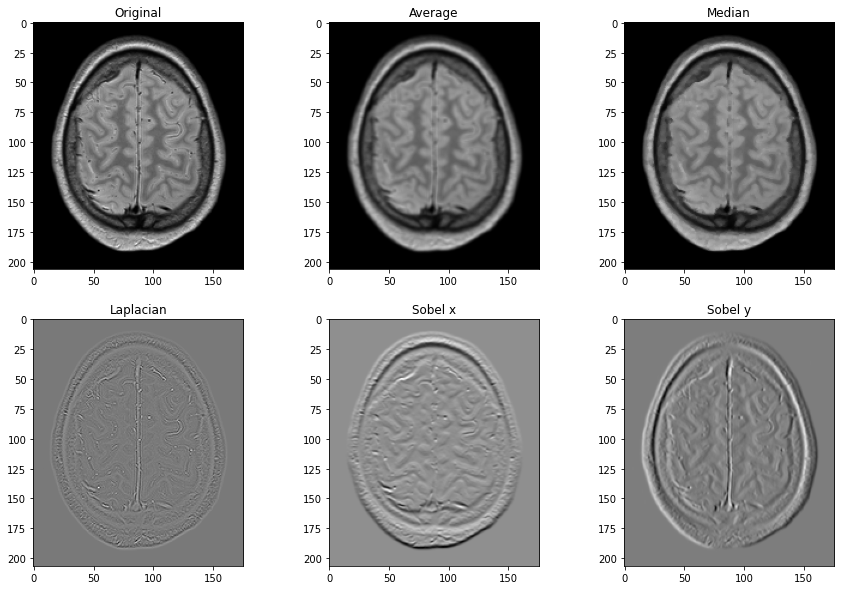

In [15]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0,0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,0].set_title('Original')

ax[0,1].imshow(avg_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,1].set_title('Average')

ax[0,2].imshow(med_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,2].set_title('Median')

ax[1,0].imshow(laplacian_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,0].set_title('Laplacian')

ax[1,1].imshow(sobelx_image, cmap = 'gray')
ax[1,1].set_title('Sobel x')

ax[1,2].imshow(sobely_image, cmap = 'gray')
ax[1,2].set_title('Sobel y')

plt.show();

We can see that **median filter** has removed the impulses in the image but the **average filter** has smoothened those impulses and made the image blurry. 

**Sobel filter** in x direction has detected the horizontal edges(up to down transitions) and **Sobel filter** in y direction has detected the vertical edges(left to right transitions). Thats because the derivative in x direction tells us about the change in intensity in x direction and thus horizontal edges and the derivative in y direction tells us about the change in intensity in y direction and thus vertical edges.

### C: 5×5 Median and average filter

Lets apply a 5×5 median and average filter on the image:

In [16]:
avg_blur_image5 = filter(image, 'avg', k_size = 5)
med_blur_image5 = filter(image, 'med', k_size = 5)

Now we can plot the results:

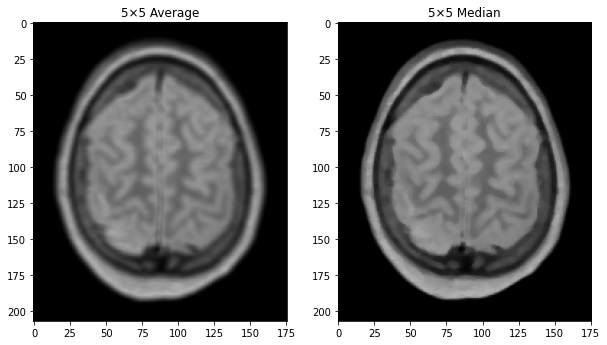

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(avg_blur_image5, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('5×5 Average')

ax[1].imshow(med_blur_image5, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('5×5 Median')

plt.show();

We can observe that the **5×5 average filter** has removed the impulses in the image because of the larger kernel size. One the other hand enlarging the kernel size has caused the average filter to smoothen the image more than the 3×3 average filter and thus the image is more blurry.

Looking at the **5×5 median filter** and comparing with 3×3 median filter we can see that it has removed larger impulses because this filter calculates the median for a neighborhood with size 25. Thus, the resulting image is more smooth and also the variety of intensity values is less.

### D: Custom filter

In this section I want to apply a smoothing filter to the image which has more attention to the center pixel and less attention to the pixels in the neighborhood. 

The filter I want to apply is:
$
\begin{bmatrix} 
\frac{1}{36} & \frac{4}{36} & \frac{1}{36}\\
\frac{4}{36} & \frac{16}{36} & \frac{4}{36}\\
\frac{1}{36} & \frac{4}{36} & \frac{1}{36}
\end{bmatrix}
$

I'll use the `correlation()` function to perform correlation operation.

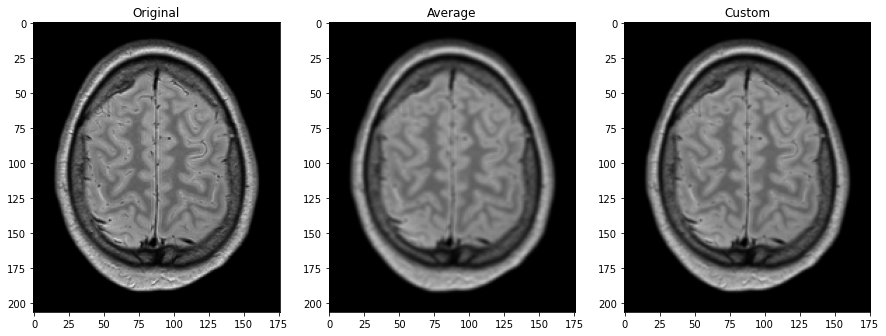

In [18]:
kernel = np.array([
    [1/36, 4/36, 1/36],
    [4/36, 16/36, 4/36],
    [1/36, 4/36, 1/36]
])
new_image = correlation(image, kernel)
new_image = new_image.astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')

ax[1].imshow(avg_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Average')

ax[2].imshow(new_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('Custom')

plt.show();

It is clear that using this new filter, the details in the image are more preserved than the average filter and the image is less blurry than the average filter. Because of this, the impulses are more visible in the new image.